## Gather

In [1]:
import numpy as np
import pandas as pd
import datetime
import requests
import re
import tweepy
import json
import os
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1].replace('-', '_')

if not os.path.isfile(file_name):
    with open(file_name, 'wb')as file:
        file.write(response.content)

In [3]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
archive = pd.read_csv('twitter_archive_enhanced.csv')

#### In order to extract data from Twitter API you should 
1. First, if you do not already have one, you need to sign up for a Twitter account.
2. Next, to set up a developer account, follow the directions on [Twitter’s Developer Portal, in the “How to Apply” section](https://developer.twitter.com/en/docs/developer-portal/overview).
3. If you can't set up a Twitter developer account, or you prefer not to create a Twitter account for some reason, you may instead download it [tweet_json.txt](https://drive.google.com/file/d/12U4lYQ91arTjkxT7L8jzE-5VVdfHwnJM/view).

In [5]:
#Insert your keys & tokens in the 4 strings below and make sure not to share them with anyone
file = open('twitter_api_creds.txt')
lines = file.readlines()

consumer_key = lines[0].strip()     # your consumer key
consumer_secret = lines[1].strip()  # your consumer secret
access_token = lines[2].strip()     # your access token
access_secret = lines[3]            # your access secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
exp_tweet = api.get_status(archive.tweet_id[600], tweet_mode = 'extended')
content = exp_tweet._json
content

{'created_at': 'Tue Nov 15 23:44:44 +0000 2016',
 'id': 798673117451325440,
 'id_str': '798673117451325440',
 'full_text': 'RT @dog_rates: I shall call him squishy and he shall be mine, and he shall be my squishy. 13/10 https://t.co/WId5lxNdPH',
 'truncated': False,
 'display_text_range': [0, 119],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'dog_rates',
    'name': 'WeRateDogs®',
    'id': 4196983835,
    'id_str': '4196983835',
    'indices': [3, 13]}],
  'urls': [],
  'media': [{'id': 675501041127936000,
    'id_str': '675501041127936000',
    'indices': [96, 119],
    'media_url': 'http://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg',
    'url': 'https://t.co/WId5lxNdPH',
    'display_url': 'pic.twitter.com/WId5lxNdPH',
    'expanded_url': 'https://twitter.com/dog_rates/status/675501075957489664/photo/1',
    'type': 'photo',
    'sizes': {'small': {'w': 600, 'h': 600, 'resiz

In [7]:
content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [8]:
#Getting the retweet_count and favorite_count for the test tweet and user_followers_count
content['retweet_count'], content['id'], content['favorite_count'], content['user']['followers_count']

(5453, 798673117451325440, 0, 8988792)

In [9]:
errors = []
if not os.path.isfile('tweet_json.txt'):
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,
                                        wait_on_rate_limit_notify=True,
                                        tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 146


Error on tweet id 874057562936811520;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 874012996292530176;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872820683541237760;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 871879754684805121;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'A

Rate limit reached. Sleeping for: 205


Error on tweet id 746872823977771008;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 746056683365994496;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 739606147276148736;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 738402415918125056;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on tweet id 735274964362878976;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error on t

KeyboardInterrupt: 

In [10]:
len(errors)

51

In [11]:
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        tweet = json.loads(line)
    
        print(tweet['id'])
        print(tweet['retweet_count'])
        print(tweet['favorite_count'])
        print(tweet['user']['followers_count'])
        break

892420643555336193
7456
35324
8910492


In [12]:
twitter_API_list = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        tweet = json.loads(line)
    
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        user_followers_count = tweet['user']['followers_count']
    
        # Append to list of dictionaries
        twitter_API_list.append({'tweet_id':tweet_id,
                                 'retweet_count':retweet_count,
                                 'favorite_count':favorite_count,
                                 'user_followers_count':user_followers_count})
        
twitter_API = pd.DataFrame(twitter_API_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'user_followers_count'])

***
***
## Assess

In [13]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1171,720415127506415616,NaN,NaN,2016-04-14 00:55:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Garden's coming in nice this year. 10/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720415127...,10,10,None,None,None,None,None
2321,666435652385423360,NaN,NaN,2015-11-17 02:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Can you behave? You're ruining my wedding day...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666435652...,10,10,None,None,None,None,None
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,None,None
490,813812741911748608,NaN,NaN,2016-12-27 18:24:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Gary, Carrie Fisher's dog. Idk what I can...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/813812741...,14,10,Gary,None,None,None,None
1006,747648653817413632,NaN,NaN,2016-06-28 04:31:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Keurig. He apparently headbutts other ...,NaN,NaN,NaN,https://vine.co/v/iqIZFtOxEMB,12,10,Keurig,None,None,None,None


In [15]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
light          1
Alexander      1
Akumi          1
Mimosa         1
Pubert         1
Name: name, Length: 957, dtype: int64

In [16]:
names = sorted(list(archive.name.unique()))
wrong_names = []
for name in names:
    if name.islower():
        wrong_names.append(name)
wrong_names

['a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very']

In [17]:
total_wrong_names = 0
for x in wrong_names:
    total_wrong_names += archive[archive.name == x].name.value_counts().sum()
total_wrong_names

109

In [18]:
archive.doggo.value_counts(), '', archive.floofer.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64,
 '',
 None       2346
 floofer      10
 Name: floofer, dtype: int64)

In [19]:
archive.pupper.value_counts(), '', archive.puppo.value_counts()

(None      2099
 pupper     257
 Name: pupper, dtype: int64,
 '',
 None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [20]:
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [21]:
archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
926,702598099714314240,https://pbs.twimg.com/media/CcAhPevW8AAoknv.jpg,1,kelpie,0.219179,True,badger,0.133584,False,Siamese_cat,0.074440,False
549,677530072887205888,https://pbs.twimg.com/media/CWcSAI-WUAAOB9W.jpg,1,Staffordshire_bullterrier,0.689259,True,Norwegian_elkhound,0.026121,True,American_Staffordshire_terrier,0.023075,True
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True
1493,783085703974514689,https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg,1,Chesapeake_Bay_retriever,0.240602,True,Airedale,0.164088,True,boxer,0.134506,True
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True


In [24]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [25]:
print('First Prediction list: \n', image_predictions.p1.value_counts(), '\n', sep='')
print('Second Prediction list: \n', image_predictions.p2.value_counts(), '\n', sep='')
print('Third Prediction list: \n', image_predictions.p3.value_counts(), '\n', sep='')

First Prediction list: 
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
fire_engine             1
nail                    1
walking_stick           1
sunglasses              1
hammer                  1
Name: p1, Length: 378, dtype: int64

Second Prediction list: 
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
coffee_mug              1
bearskin                1
rain_barrel             1
cornet                  1
sweatshirt              1
Name: p2, Length: 405, dtype: int64

Third Prediction list: 
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
hand_blower            1
buckeye                1
passenger_car          1
lion                   1
whiptail               1
Name: 

In [26]:
image_predictions.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [27]:
image_predictions.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [28]:
image_predictions.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [29]:
twitter_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   tweet_id              2331 non-null   int64
 1   retweet_count         2331 non-null   int64
 2   favorite_count        2331 non-null   int64
 3   user_followers_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [30]:
twitter_API.sample(5)

,tweet_id,retweet_count,favorite_count,user_followers_count
1523,689280876073582592,683,1927,8910519
998,746542875601690625,1832,4918,8910511
2244,667509364010450944,1965,6356,8910544
247,843604394117681152,2630,16423,8910495
1093,732375214819057664,2422,7825,8910512


In [31]:
twitter_API[['retweet_count', 'favorite_count', 'user_followers_count']].describe()

,retweet_count,favorite_count,user_followers_count
count,2331.000000,2331.000000,2.331000e+03
mean,2619.591163,7381.314457,8.910515e+06
std,4432.015058,11464.575618,1.685265e+01
min,1.000000,0.000000,8.910492e+06
25%,530.500000,1283.500000,8.910498e+06
50%,1223.000000,3203.000000,8.910512e+06
75%,3041.500000,9030.500000,8.910524e+06
max,75270.000000,152220.000000,8.910545e+06


### Quality
#### **`archive` table**
1. 109 erroneous name values (assigned as 'a', 'an', 'actually', 'his', ....)
2. tweet_id is an integer not a string
3. Inconsistent datatypes (timestamp, retweeted_status_timestamp)
4. Tweets without photos exist
5. Retweets & replies exist
6. Unuseful data (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
7. None values in dog stage columns

#### **`image_pridections` table**
8. Undescriptive columns' headers for image_predictions
9. tweet_id is an integer not a string

#### **`twitter_API` table**
10. tweet_id is an integer not a string

### Tidiness
1. Dog stage are values represented as column names in archive table
2. Information about one type of observational unit (tweets) is spread across three different files/dataframes

***
***
## Clean

In [32]:
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
api_clean = twitter_API.copy()

###  Missing Data

#### 1. 109 erroneous name values (assigned as 'a', 'an', 'actually', 'his', ....)

##### Define
archive: Iterate text columns trying to extract dog names, and putting NaN if name is not found.

In [33]:
for index, row in archive_clean.iterrows():
    print (index, row)
    break

0 tweet_id                                                     892420643555336193
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-08-01 16:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Phineas. He's a mystical boy. Only eve...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/892420643...
rating_numerator                                                             13
rating_denominator                                                           10
name                                  

In [34]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():
    try:
        for wrong in wrong_names:
            if row['name'] == wrong:
                c_name = re.findall(pattern_2, row['text'])[0]
                archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('a', c_name)
    except IndexError:
        archive_clean.loc[index,'name'] = np.nan
    if row['name'] == 'my':
        archive_clean.loc[index,'name'] = np.nan

In [35]:
archive_clean.name.value_counts(dropna=False)

None         745
NaN           88
Charlie       12
Oliver        11
Lucy          11
            ... 
Jebberson      1
Timmy          1
Chase          1
Poppy          1
Pubert         1
Name: name, Length: 951, dtype: int64

In [36]:
namesss = set(list(archive_clean.name.unique()))
namesss

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfonso',
 'Alfredo',
 'Alfy',
 'Alice',
 'Alphred',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertan',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 '

### Quality

#### 2. tweet_id wrong data type

##### Define
Converting tweet_id to string in the three tables using astype

In [37]:
archive_clean.tweet_id = archive_clean.tweet_id.astype('str')
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')
api_clean.tweet_id = api_clean.tweet_id.astype('str')

In [38]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tweet_id              2331 non-null   object
 1   retweet_count         2331 non-null   int64 
 2   favorite_count        2331 non-null   int64 
 3   user_followers_count  2331 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


#### 3. Inconsistent datatypes (timestamp, retweeted_status_timestamp)

##### Define
archive: Convert datatypes of 'timestamp' & 'retweeted_status_timestamp' to date using to_datetime.

In [39]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### 4. Tweets without photos exist

##### Define
Use the image_predictions table to guide the selection and removal of tweets without photos in the archive table

In [41]:
tweets_with_image = list(image_predictions_clean.tweet_id.unique())

len(tweets_with_image) == archive_clean.tweet_id.isin(tweets_with_image).sum()

archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_with_image)]

In [42]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2075 non-null   datetime64[ns, UTC]
 4   source                      2075 non-null   object             
 5   text                        2075 non-null   object             
 6   retweeted_status_id         81 non-null     float64            
 7   retweeted_status_user_id    81 non-null     float64            
 8   retweeted_status_timestamp  81 non-null     datetime64[ns, UTC]
 9   expanded_urls               2075 non-null   object             
 10  rating_numerator            2075 non-null   int64           

#### 5. Retweets & replies exist

##### Define
Using the following columns (in_reply_to_status_id, in_reply_to_user_id, 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'), we will shed the retweets and replies from our datasets and then will drop them.

In [43]:
retweet_entries = archive_clean.retweeted_status_id.notnull()
archive_clean[retweet_entries].shape[0]
archive_clean = archive_clean[~retweet_entries]
# Delete same rows from image_predictions_clean too
retweets = np.logical_not(image_predictions_clean.tweet_id.isin(list(archive_clean.tweet_id)))
image_predictions_clean = image_predictions_clean[~retweets]

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   int64           

In [45]:
reply_entries = archive_clean.in_reply_to_status_id.notnull()
archive_clean = archive_clean[~reply_entries]
# Delete same rows from image_predictions_clean too
replies = np.logical_not(image_predictions_clean.tweet_id.isin(list(archive_clean.tweet_id)))
image_predictions_clean = image_predictions_clean[~replies]

In [46]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   object 
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64           

#### 6. Unuseful data (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

##### Define
Drop all unuseful data from archive table

In [48]:
archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                            'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1894 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### 7. None values in dog stage columns

##### Define
Replace the “None” string with empty string ""

In [49]:
archive_clean.doggo = archive_clean.doggo.replace('None', '')
archive_clean.floofer = archive_clean.floofer.replace('None', '')
archive_clean.pupper = archive_clean.pupper.replace('None', '')
archive_clean.puppo = archive_clean.puppo.replace('None', '')

In [50]:
archive_clean.loc[:,['doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,doggo,floofer,pupper,puppo
1283,,,,
2146,,,,
1800,,,,
2291,,,,
2192,,,,


#### 8. Undescriptive columns' headers for image_predictions

##### Define
Convert columns names into a more descriptive names.

In [51]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_clean.columns = cols

In [52]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1',
       'breed_1', 'prediction_2', 'confidence_2', 'breed_2', 'prediction_3',
       'confidence_3', 'breed_3'],
      dtype='object')

###  Tidiness

#### 1. Dog stage are values represented as column names in archive table

##### Define
doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.

In [53]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [54]:
archive_clean['dog_breed'] = (archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo).str.strip()

In [55]:
archive_clean.dog_breed.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [56]:
for index, row in archive_clean.iterrows():
    if row['dog_breed'] == '':
        archive_clean.loc[index,'dog_breed'] = np.nan
    elif row['dog_breed'] == 'doggopuppo':
        archive_clean.loc[index,'dog_breed'] = 'doggo-puppo'
    elif row['dog_breed'] == 'doggofloofer':
        archive_clean.loc[index,'dog_breed'] = 'doggo-floofer'
    elif row['dog_breed'] == 'doggopupper':
        archive_clean.loc[index,'dog_breed'] = 'doggo-pupper'

In [57]:
archive_clean.dog_breed.value_counts(dropna=False)

NaN              1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: dog_breed, dtype: int64

In [58]:
archive_clean.drop(columns=['doggo', 'floofer', 'puppo', 'pupper'], inplace=True)

#### 2. Information about one type of observational unit (tweets) is spread across three different files/dataframes

##### Define
Using pd.merge function we will put all tables into one master table as they are part of the same observational unit.

In [59]:
archive_clean.shape, api_clean.shape, image_predictions_clean.shape

((1971, 9), (2331, 4), (1971, 12))

In [60]:
df_temp = pd.merge(archive_clean, api_clean, on='tweet_id', how='left')

In [61]:
df_temp.shape

(1971, 12)

In [62]:
df = pd.merge(df_temp, image_predictions_clean, on='tweet_id', how='left')

In [63]:
df.shape

(1971, 23)

***
***
## Storing Data to csv file

##### Define
Using to_csv function we will store our final data to a csv file

In [64]:
df.to_csv('twitter_archive_master.csv', index=False)

***
***
## Analyzing Data

In [65]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_breed',
       'retweet_count', 'favorite_count', 'user_followers_count', 'jpg_url',
       'img_num', 'prediction_1', 'confidence_1', 'breed_1', 'prediction_2',
       'confidence_2', 'breed_2', 'prediction_3', 'confidence_3', 'breed_3'],
      dtype='object')

In [66]:
df.retweet_count.describe()

count     1964.000000
mean      2394.644094
std       4279.753264
min         11.000000
25%        533.750000
50%       1160.000000
75%       2732.000000
max      75270.000000
Name: retweet_count, dtype: float64

In [67]:
list(df[df.retweet_count == df.retweet_count.max()].text)

["Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"]

In [68]:
list(df[df.retweet_count == df.retweet_count.max()].jpg_url)

['https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg']

In [69]:
list(df[df.retweet_count == df.retweet_count.min()].text)

['Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq']

In [70]:
list(df[df.retweet_count == df.retweet_count.min()].jpg_url)

['https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg']

In [71]:
df.favorite_count.describe()

count      1964.000000
mean       8126.608961
std       11953.717413
min          69.000000
25%        1743.000000
50%        3666.000000
75%       10141.500000
max      152220.000000
Name: favorite_count, dtype: float64

In [72]:
list(df[df.favorite_count == df.favorite_count.max()].text)

["Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"]

In [73]:
list(df[df.favorite_count == df.favorite_count.min()].text)

['Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq']

In [74]:
df.prediction_1.value_counts()

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
sunglasses              1
bighorn                 1
king_penguin            1
cliff                   1
ice_lolly               1
Name: prediction_1, Length: 373, dtype: int64

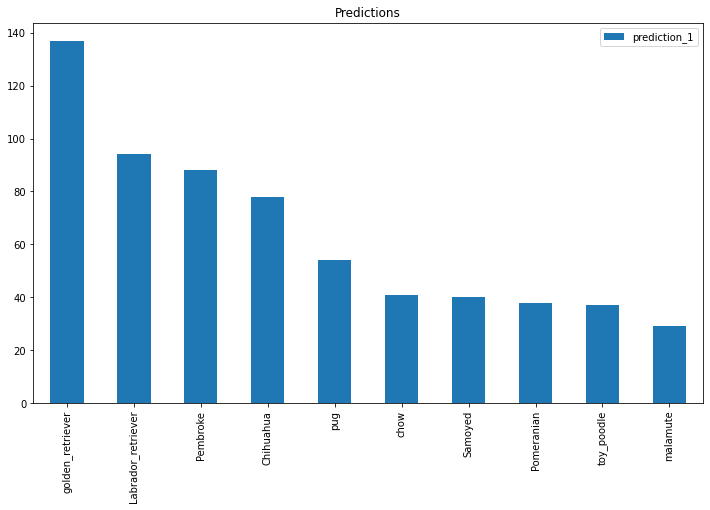

In [75]:
df.prediction_1.value_counts()[:10].plot(kind='bar', title='Predictions', figsize=(12,7), legend=True);

In [76]:
df.dog_breed.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_breed, dtype: int64

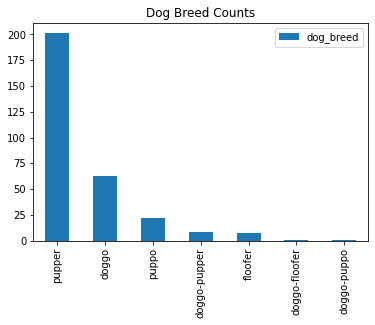

In [77]:
df.dog_breed.value_counts().plot(kind='bar', title='Dog Breed Counts', legend=True);

In [78]:
df.rating_numerator.describe()

count    1971.000000
mean       12.223237
std        41.634034
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [79]:
list(df[df.rating_numerator == df.rating_numerator.max()].name)

['Atticus']

In [80]:
list(df[df.rating_numerator == df.rating_numerator.max()].jpg_url)

['https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg']

In [81]:
list(df[df.rating_numerator == df.rating_numerator.min()].name)

['None']

In [82]:
list(df[df.rating_numerator == df.rating_numerator.min()].jpg_url)

['https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg']